<a href="https://colab.research.google.com/github/sandeepkumar4451/ServerClientApp/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/creditcard.csv')
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

(7973, 31)

In [2]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]
print("Normal DataPoints: ",normal.shape[0])
print("Fraud DataPoints: ", fraud.shape[0])

Normal DataPoints:  7947
Fraud DataPoints:  25


Distribution of fraudulent points:0.31%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


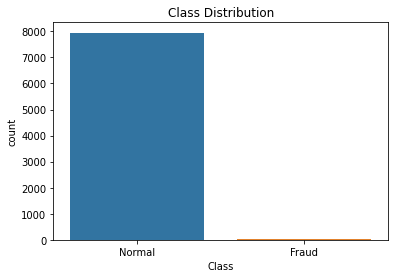

In [4]:
print(("Distribution of fraudulent points:{:.2f}%".format(len(df[df['Class']==1])/len(df)*100)))
sns.countplot(df['Class'])
plt.title('Class Distribution')
plt.xticks(range(2),['Normal','Fraud'])
plt.show()

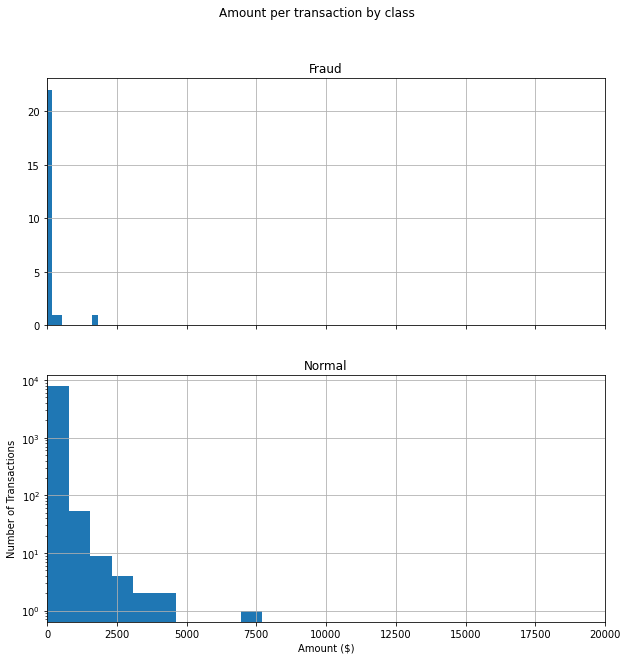

In [5]:
df.describe()
normal['Amount'].describe()
fraud['Amount'].describe()
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (10,10) )
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax1.grid()
ax2.grid()
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

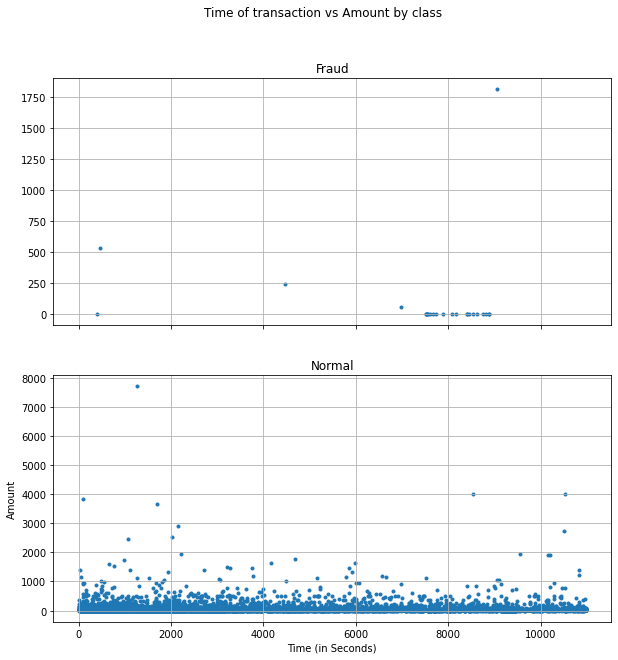

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, marker='.')
ax1.set_title('Fraud')
ax1.grid()
ax2.scatter(normal.Time, normal.Amount, marker='.')
ax2.set_title('Normal')
ax2.grid()
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [7]:
data = df.drop(['Time'], axis =1)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train
X_test = X_test
print(X_train.shape)
#(227451,29)
print(X_test.shape)
#(56962,29)
print(y_test.shape)
#(56962)
scaler = StandardScaler().fit(X_train.Amount.values.reshape(-1,1))
X_train['Amount'] = scaler.transform(X_train.Amount.values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test.Amount.values.reshape(-1,1))
X_train.shape

(6355, 29)
(1595, 29)
(1595,)


(6355, 29)

In [8]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh",
activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
X_train.shape
#(227451,29)
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam',
loss='mean_squared_error',
)
checkpointer = ModelCheckpoint(filepath="model.h5",
verbose=0,
save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
histogram_freq=0,
write_graph=True,
write_images=True)
history = autoencoder.fit(X_train, X_train,
epochs=nb_epoch,
batch_size=batch_size,
shuffle=True,
validation_split=0.3,
verbose=1,
callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
139/139 [==============================] - 1s 4ms/step - loss: 1.0376 - val_loss: 1.0472
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.9178 - val_loss: 0.9900
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8852 - val_loss: 0.9668
Epoch 4/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8665 - val_loss: 0.9517
Epoch 5/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8523 - val_loss: 0.9384
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.8391 - val_loss: 0.9257
Epoch 7/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8264 - val_loss: 0.9128
Epoch 8/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8129 - val_loss: 0.9005
Epoch 9/100
139/139 [==============================] - 0s 3ms/step - loss: 0.8006 - val_loss: 0.8901
Epoch 10/100
139/139 [==============================] - 0s 3ms/step - loss: 0.7905 - val_lo